# Hoja de trabajo 1 - Análisis exploratorio 

In [1]:
import warnings
warnings.filterwarnings('ignore')
%pip install scipy numpy statsmodels seaborn pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importar librerías Generales
import scipy.stats as stats
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import locale
from scipy.stats import anderson
import statsmodels.api as sm


%matplotlib inline

### Haga una exploración rápida de sus datos, para eso haga un resumen de su conjunto de datos.

In [3]:
locale.setlocale( locale.LC_ALL, '' )

# Lectura de datos
df = pd.read_csv('movies.csv')

# drop where index of row is 902	
df = df.drop(902)

#### Pre procesamiento de datos 

In [4]:
# pre procesamiento de datos en el dataframe
df['id'] = df['id'].astype(str)
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['genres'] = df['genres'].str.split('|')
df['homePage'] = df['homePage'].astype(str)
df['productionCompany'] = df['productionCompany'].str.split('|')
df['productionCompanyCountry'] = df['productionCompanyCountry'].str.split('|')
df['productionCountry'] = df['productionCountry'].str.split('|')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')
df['runtime'] = pd.to_numeric(df['runtime'], errors='coerce')
df['video'] = df['video'].astype(bool)
df['director'] = df['director'].str.split('|')
df['actors'] = df['actors'].str.split('|')
# Dividir las cadenas en la columna 'actorsPopularity' por el carácter '|'
df['actorsPopularity'] = df['actorsPopularity'].str.split('|')

# Convertir los elementos de las listas en actorsPopularity a floats
df['actorsPopularity'] = df['actorsPopularity'].apply(
    lambda x: [float(val) if val.replace('.', '', 1).isdigit() else 0 for val in x] if isinstance(x, list) else x
)
df['actorsCharacter'] = df['actorsCharacter'].str.split('|')
df['originalTitle'] = df['originalTitle'].astype(str)
df['title'] = df['title'].astype(str)
df['originalLanguage'] = df['originalLanguage'].astype(str)
df['popularity'] = pd.to_numeric(df['popularity'], errors='coerce')
df['releaseDate'] = df['releaseDate'].astype(str)
df['voteAvg'] = pd.to_numeric(df['voteAvg'], errors='coerce')
df['voteCount'] = pd.to_numeric(df['voteCount'], errors='coerce')
df['genresAmount'] = pd.to_numeric(df['genresAmount'], errors='coerce')
df['productionCoAmount'] = pd.to_numeric(df['productionCoAmount'], errors='coerce')
df['productionCountriesAmount'] = pd.to_numeric(df['productionCountriesAmount'], errors='coerce')
df['actorsAmount'] = pd.to_numeric(df['actorsAmount'], errors='coerce')
df['castWomenAmount'] = pd.to_numeric(df['castWomenAmount'], errors='coerce')
df['castMenAmount'] = pd.to_numeric(df['castMenAmount'], errors='coerce')

### *Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)*

In [5]:
def asign(x):
    switch = {
        1: 'cualitativa nominal',
        2: 'cualitativa ordinal',
        3: 'cuantitativa continua',
        4: 'cuantitativa discreta'
    }
    return switch.get(x, 'Unknown')

tipo_var = [
    3, 1, 3, 3, 2, 1, 1, 3, 1, 3, 4, 4, 4, 4
]



In [6]:
# hay columnas que no aportan valor al analisis. Se eliminan
df = df.drop(['id', 'homePage', 'video', 'actorsPopularity', 'actorsCharacter', 'originalTitle', 'originalLanguage', 'productionCompany', 'productionCompanyCountry', 'productionCountry', 'productionCoAmount', 'genresAmount', 'productionCountriesAmount'], axis=1)

### Diga el tipo de cada una de las variables (cualitativa ordinal o nominal, cuantitativa continua, cuantitativa discreta)

In [7]:
table = pd.DataFrame({
    'index of the column': [i for i, _ in enumerate(df.columns)],
    'type of the first non-null element of the column': df.apply(lambda x: type(x.dropna().iloc[0]) if x.dropna().size else None),
    'number of NaN values in the column': df.isna().sum()
})

# add a COLUMN to the dataframe table and assign the type of variable using the function asign
table['type of variable'] = [asign(x) for x in tipo_var]

# Print the table
table.head(100)

,index of the column,type of the first non-null element of the column,number of NaN values in the column,type of variable
budget,0,<class 'numpy.int64'>,0,cuantitativa continua
genres,1,<class 'list'>,53,cualitativa nominal
revenue,2,<class 'numpy.int64'>,0,cuantitativa continua
runtime,3,<class 'numpy.int64'>,0,cuantitativa continua
director,4,<class 'list'>,74,cualitativa ordinal
actors,5,<class 'list'>,80,cualitativa nominal
title,6,<class 'str'>,0,cualitativa nominal
popularity,7,<class 'numpy.float64'>,1,cuantitativa continua
releaseDate,8,<class 'str'>,0,cualitativa nominal
voteAvg,9,<class 'numpy.float64'>,1,cuantitativa continua


Hemos clasificado las variables que usaremos para esta hoja de trabajo de la siguiente forma:

- **cuantitativas continuas** : budget, revenue, popularity, voteAvg. 
- **cuantitativas discretas** : voteCount, actorsAmount, castWomenAmount, castMenAmount
- **cualitativas nominales** : actors, title, releaseDate
- **cualitativas ordinales**: director

### Investigue si las variables cuantitativas siguen una distribución normal y haga una tabla de frecuencias de las variables cualitativas. Explique todos los resultados. 

In [8]:
# comenzaremos por eliminar las filas con datos incorrectos. 
def get_rows_with_nan(df, column_name):
    return df[df[column_name].isna()]

def delete_row(df, index):
    return df.drop(index)

def get_rows_with_str_list(df, column_name):
    return df[df[column_name].apply(lambda x: isinstance(x, list) and any(isinstance(i, str) for i in x))]


In [9]:
# Cambiamos los NaN por 0 en las columnas que son numericas

df['budget'] = df['budget'].fillna(0)

df['revenue'] = df['revenue'].fillna(0)

df['runtime'] = df['runtime'].fillna(0)

df['popularity'] = df['popularity'].fillna(0)

df['voteAvg'] = df['voteAvg'].fillna(0)

df['voteCount'] = df['voteCount'].fillna(0)

df['actorsAmount'] = df['actorsAmount'].fillna(0)

df['castWomenAmount'] = df['castWomenAmount'].fillna(0)

df['castMenAmount'] = df['castMenAmount'].fillna(0)


# Eliminamos las filas con datos incorrectos

# para budget
rows = get_rows_with_nan(df, 'budget')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna budget. ")


# para revenue
rows = get_rows_with_nan(df, 'revenue')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna revenue. ")

# para runtime
rows = get_rows_with_nan(df, 'runtime')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna runtime. ")

# para popularity
rows = get_rows_with_nan(df, 'popularity')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna popularity. ")

# para voteAvg
rows = get_rows_with_nan(df, 'voteAvg')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna voteAvg. ")

# para voteCount
rows = get_rows_with_nan(df, 'voteCount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna voteCount. ")

# para actorsAmount
rows = get_rows_with_nan(df, 'actorsAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna actorsAmount. ")

# para castWomenAmount
rows = get_rows_with_nan(df, 'castWomenAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna castWomenAmount. ")

# para castMenAmount
rows = get_rows_with_nan(df, 'castMenAmount')
for index, row in rows.iterrows():
    df = delete_row(df, index)
print(len(rows), " fueron afectadas en relacion a la columna castMenAmount. ")

0  fueron afectadas en relacion a la columna budget. 
0  fueron afectadas en relacion a la columna revenue. 
0  fueron afectadas en relacion a la columna runtime. 
0  fueron afectadas en relacion a la columna popularity. 
0  fueron afectadas en relacion a la columna voteAvg. 
0  fueron afectadas en relacion a la columna voteCount. 
0  fueron afectadas en relacion a la columna actorsAmount. 
0  fueron afectadas en relacion a la columna castWomenAmount. 
0  fueron afectadas en relacion a la columna castMenAmount. 


#### Distribución de variables cuantitativas

In [10]:
def plot_distributionSingle(column_name):
    # using df[column_name] select the column to plot. 
    # graph needs to be an histogram. 

    plt.figure(figsize=(10, 5))
    title = 'Distribución de ' + str(column_name)
    plt.title(title)
    plt.xlabel(column_name)
    plt.ylabel('Frecuencia')
    plt.hist(df[column_name], bins=40)
    plt.show()


def plot_distribution_list(column_name):
    # Filter out NaN values and flatten the list
    all_values = [value for values_list in df[column_name].dropna() if isinstance(values_list, list) and len(values_list) > 0 for value in values_list]

    # ignora las filas en donde el valor de la celda es igual a 0
    all_values = [value for value in all_values if value > 0]

    if not all_values:
        print(f"No valid values to plot in column: {column_name}")
        return

    # Create a DataFrame with counts
    value_counts = pd.Series(all_values).value_counts()

    # Plot the distribution
    plt.figure(figsize=(12, 6))
    value_counts.plot(kind='bar', color='skyblue')
    plt.title('Distribución de Valores en {}'.format(column_name))
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')
    plt.show()



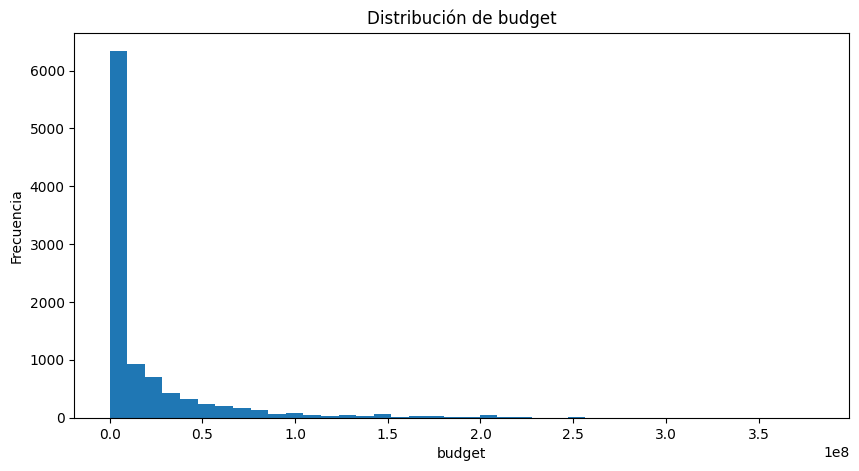

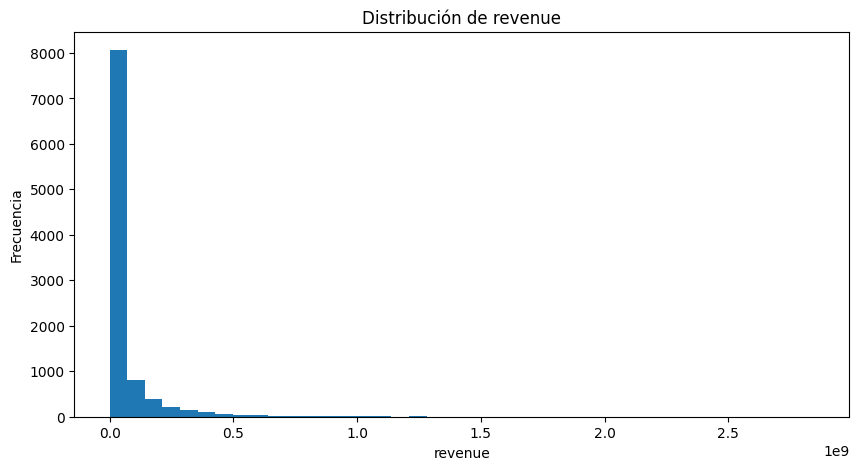

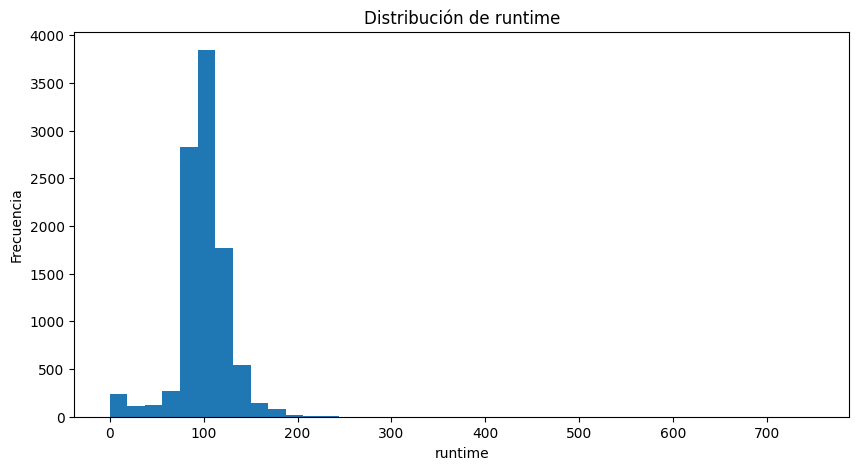

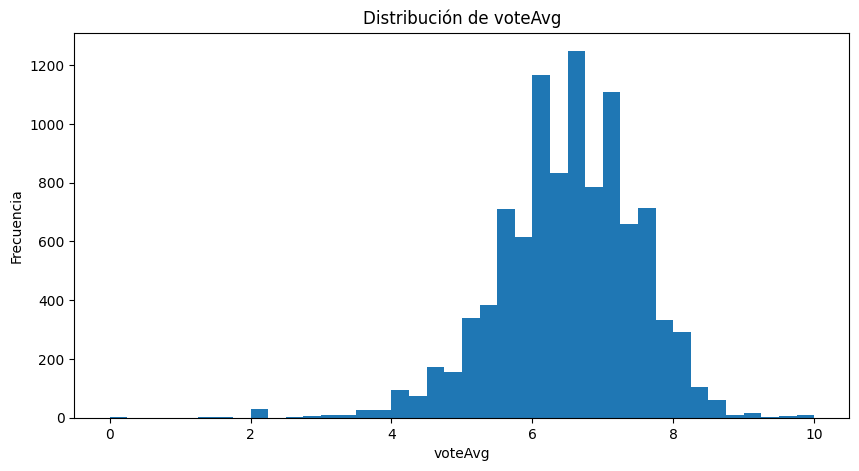

No valid values to plot in column: voteCount


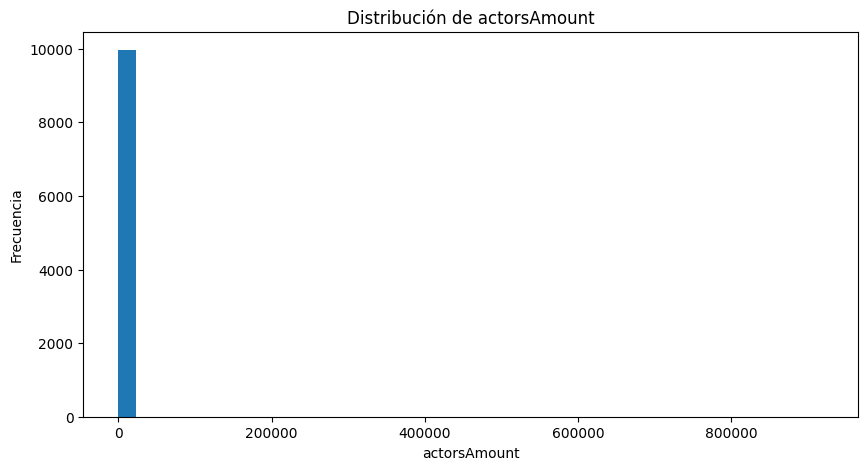

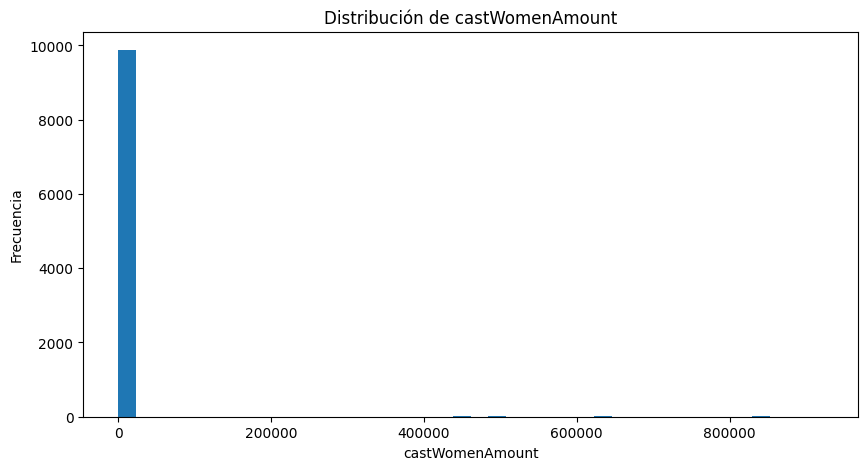

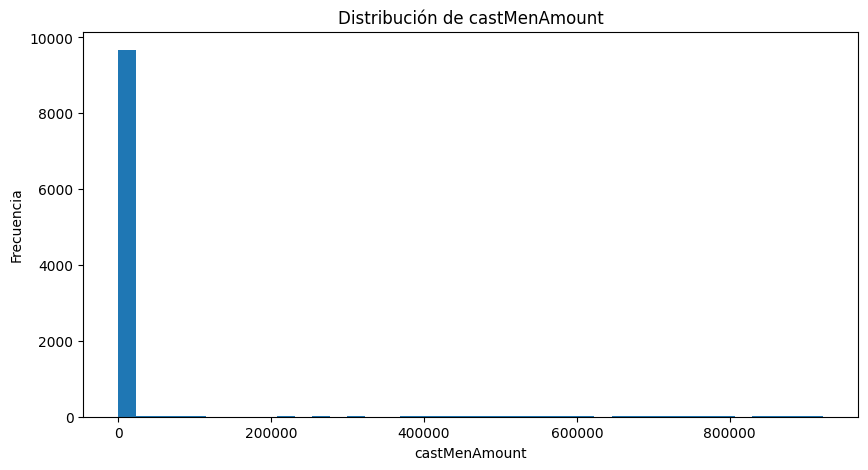

In [11]:
# budget
plot_distributionSingle('budget')

# revenue
plot_distributionSingle('revenue')

# runtime
plot_distributionSingle('runtime')

# voteAvg
plot_distributionSingle('voteAvg')

# voteCount
plot_distribution_list('voteCount')

# actorsAmount
plot_distributionSingle('actorsAmount')

# castWomenAmount
plot_distributionSingle('castWomenAmount')

# castMenAmount
plot_distributionSingle('castMenAmount')

Las variables cuantitativas no siguen una distribución normal en ninguno de los casos. 

#### Tabla de frecuencia de variables cualitativas

##### Tabla de frecuencía de generos

In [12]:
# Aplanar las listas en la columna 'genres'
df_genres_expanded = df['genres'].explode().dropna()

# Dividir cada elemento por la coma y agregar a una nueva lista
lista_final_generos = [genre.strip() for sublist in df_genres_expanded.str.split(',') for genre in sublist]

# Crear la tabla de frecuencias como DataFrame
tabla_frecuencias_generos = pd.Series(lista_final_generos).value_counts().reset_index()
tabla_frecuencias_generos.columns = ['Género', 'Frecuencia']

# Imprimir las primeras filas de la tabla de frecuencias
tabla_frecuencias_generos.head(20)

,Género,Frecuencia
0,Drama,3789
1,Comedy,3018
2,Action,2632
3,Thriller,2565
4,Adventure,1769
5,Horror,1512
6,Animation,1460
7,Romance,1428
8,Family,1407
9,Fantasy,1284


##### Tabla de frecuencias de directores

In [13]:
# Aplanar las listas en la columna 'director'
df_genres_expanded = df['director'].explode().dropna()

# Dividir cada elemento por la coma y agregar a una nueva lista
lista_final_director = [genre.strip() for sublist in df_genres_expanded.str.split(',') for genre in sublist]

# Crear la tabla de frecuencias como DataFrame
tabla_frecuencias_director = pd.Series(lista_final_director).value_counts().reset_index()

tabla_frecuencias_director.columns = ['Director', 'Frecuencia']

# Imprimir las primeras filas de la tabla de frecuencias
tabla_frecuencias_director.head(100)

,Director,Frecuencia
0,Steven Spielberg,30
1,Clint Eastwood,28
2,Ridley Scott,23
3,Sam Liu,22
4,Robert Rodriguez,21
...,...,...
95,Garry Marshall,9
96,David Cronenberg,9
97,Sean McNamara,9
98,Terry Gilliam,9


#### Tabal de frecuencia de actors

In [14]:
# aplanar las listas en la columna 'actors'
df_genres_expanded = df['actors'].explode().dropna()

# Dividir cada elemento por la coma y agregar a una nueva lista
lista_final_actors = [genre.strip() for sublist in df_genres_expanded.str.split(',') for genre in sublist]


# exluir los actores que tengan valor FALSE
lista_final_actors = [x for x in lista_final_actors if x != 'FALSE']

# Crear la tabla de frecuencias como DataFrame
tabla_frecuencias_actors = pd.Series(lista_final_actors).value_counts().reset_index()

tabla_frecuencias_actors.columns = ['Actor', 'Frecuencia']

# Imprimir las primeras filas de la tabla de frecuencias
tabla_frecuencias_actors.head(100)

,Actor,Frecuencia
0,Frank Welker,143
1,Grey DeLisle,97
2,Jeff Bennett,91
3,Fred Tatasciore,86
4,Samuel L. Jackson,85
...,...,...
95,Kazuya Nakai,37
96,Gary Oldman,37
97,Kath Soucie,37
98,Alfred Molina,36


#### Tabla de frecuencia de title

In [15]:
# Tabla de frecuencias de la columna 'title'

# Crear la tabla de frecuencias como DataFrame
tabla_frecuencias_title = df['title'].value_counts().reset_index()

tabla_frecuencias_title.columns = ['Title', 'Frecuencia']

# Imprimir las primeras filas de la tabla de frecuencias
tabla_frecuencias_title.head(100)

,Title,Frecuencia
0,Pinocchio,4
1,Cinderella,4
2,Carrie,3
3,The Courier,3
4,Awake,3
...,...,...
95,Invasion of the Body Snatchers,2
96,Poltergeist,2
97,Fantastic Four,2
98,Breach,2


In [16]:
# Tabla de frecuencias de la columna 'releaseDate'

# Crear la tabla de frecuencias como DataFrame
tabla_frecuencias_releaseDate = df['releaseDate'].value_counts().reset_index()

tabla_frecuencias_releaseDate.columns = ['ReleaseDate', 'Frecuencia']

# Imprimir las primeras filas de la tabla de frecuencias
tabla_frecuencias_releaseDate.head(100)

,ReleaseDate,Frecuencia
0,2021-10-08,15
1,2021-02-12,15
2,2021-10-01,14
3,2021-11-12,12
4,2019-11-08,11
...,...,...
95,2019-04-05,6
96,2014-10-16,6
97,2021-04-30,6
98,2020-03-06,6


Las tablas de frecuencia nos muestra las veces que se repiten ciertos valores en cada variable cualitativa. No se encontraron conclusiones significativas en la tabla de frecuencias de 'RealeaseDate', 'Title', 'actors' ni 'direcotrs'. La conclusión que se obtuvo de la tabla de frecuencias de la variable 'genres' fue que el género más comun en el set de dats es el género de drama y el ménos comun es el genero westerm.

***4.1 ¿Cuáles son las 10 películas que contaron con más presupuesto?***

In [17]:
df[['title', 'budget']].sort_values(by='budget', ascending=False).head(10)


,title,budget
716,Pirates of the Caribbean: On Stranger Tides,380000000
4711,Avengers: Age of Ultron,365000000
5953,Avengers: Endgame,356000000
4954,Justice League,300000000
5954,Avengers: Infinity War,300000000
163,Pirates of the Caribbean: At World's End,300000000
607,Superman Returns,270000000
7135,The Lion King,260000000
3792,Tangled,260000000
280,Spider-Man 3,258000000


Las 10 peliculas con más presupuesto fueron, ordenadas de mayor a menor presupuesto: 
1. Pirates of the Caribbean: On Stranger Tides
2. Avengers: Age of Ultron
3. Avengers: Endgame
4. Justice League
5. Avengers: Infinity War
6. Pirates of the Caribbean: At World's End
7. Superman Returns
8. The Lion King
9. Tangled
10. Spider-Man 3


**4.2 ¿Cuáles son las 10 películas que más ingresos tuvieron?**

In [18]:
# Ordena el DataFrame por ingresos en orden descendente
df[['title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)


,title,revenue
3211,Avatar,2847246203
5953,Avengers: Endgame,2797800564
307,Titanic,2187463944
4948,Star Wars: The Force Awakens,2068223624
5954,Avengers: Infinity War,2046239637
4915,Jurassic World,1671713208
7135,The Lion King,1667635327
9050,Spider-Man: No Way Home,1631853496
3398,The Avengers,1518815515
5088,Furious 7,1515047671


Las peliculas que más ingresos tuvieron, en orden de mayor a menor ingresos: 
1. Avatar
2. Avengers: Endgame
3. Titanic
4. 	Star Wars: The Force Awakens
5. Avengers: Infinity War
6. Jurassic World
7. The Lion King	
8. Spider-Man: No Way Home	
9. The Avengers	
10. Furious 7	

**4.3 ¿Cuál es la película que más votos tuvo?**

In [19]:
df[['title', 'voteCount']].sort_values(by='voteCount', ascending=False).head(1)

,title,voteCount
3512,Inception,30788.0


La pelicula que más votos obtuvo fue Inception con un total de 30788 votos

**4.4 ¿Cuál es la peor película de acuerdo a los votos de todos los usuarios?**

In [20]:
#Ignorar los 0 en la columna voteCount, voteAvg
df = df[df['voteCount'] != 0]

df[['title', 'voteAvg']].sort_values(by='voteAvg', ascending=True).head(1)


,title,voteAvg
9787,DAKAICHI -I'm Being Harassed by the Sexiest Ma...,1.3


La pelicula con el peor promedio de calificación fue DAKAICHI -I'm Being Harassed by the Sexiest Man of the Year- The Movie: In Spain, con una calificación media de 1.3 sobre 10.

**4.5 ¿Cuántas películas se hicieron en cada año? ¿En qué año se hicieron más
películas?**

En el año 2021 se hicieron más películas (816 películas)
El promedio de películas por año es 101.00


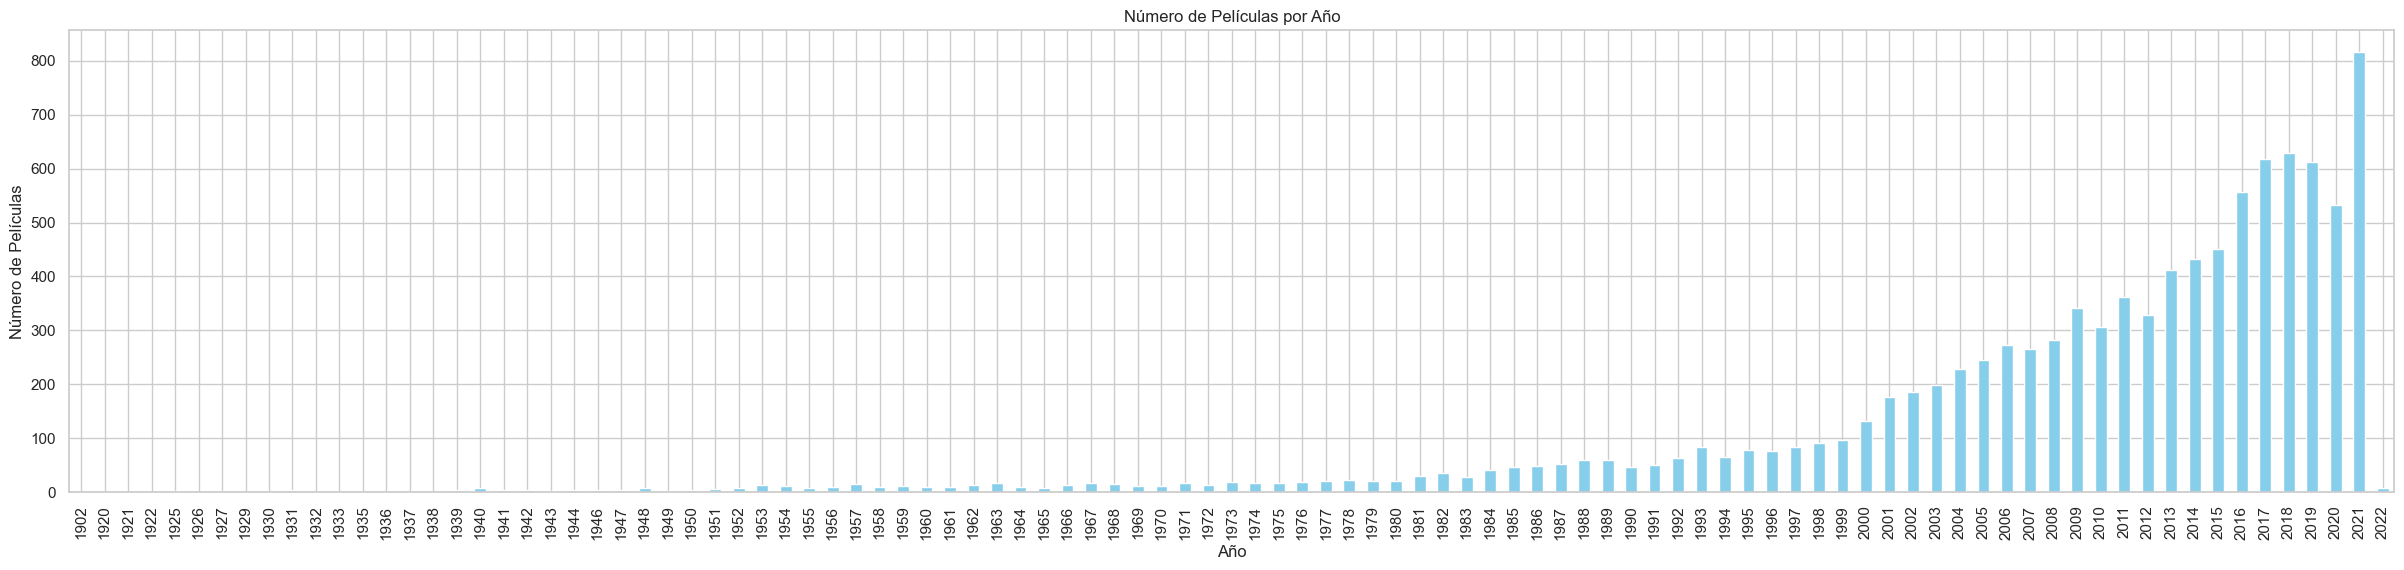

In [42]:
# Convertir la columna 'releaseDate' a tipo datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Extraer el año de la fecha de lanzamiento y convertirlo a tipo entero
df['releaseYear'] = df['releaseDate'].dt.year.astype('Int64')

# Contar el número de películas por año
num_peliculas_por_año = df['releaseYear'].value_counts().sort_index()

# Encontrar el año con más películas
año_mas_pelis = num_peliculas_por_año.idxmax()
max_pelis = num_peliculas_por_año.max()

# Imprimir el resultado
print(f"En el año {año_mas_pelis} se hicieron más películas ({max_pelis} películas)")

# Encontrar el promedio de películas por año
promedio_pelis = num_peliculas_por_año.mean()
print(f"El promedio de películas por año es {promedio_pelis:.2f}")

# Crear un gráfico de barras
plt.figure(figsize=(30, 6))
num_peliculas_por_año.plot(kind='bar', color='skyblue')
plt.title('Número de Películas por Año')
plt.xlabel('Año')
plt.ylabel('Número de Películas')
plt.show()



En la gráfica se puede observar que el año que se hicieron más películas fue en el 2021 con 816 películas. Se tiene un promedio de peliculas por año de 101. 

**4.6 ¿Cuál es el género principal de las 20 películas más recientes? ¿Cuál es el género principal que predomina en el conjunto de datos?**

In [22]:
# Convertir la columna 'releaseDate' a tipo datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Ordenar el DataFrame por la columna 'releaseDate' en orden descendente
df_recientes = df.sort_values(by='releaseDate', ascending=False)

# Crear un DataFrame con la información relevante
temp_df = pd.DataFrame({
    'Title': df_recientes['title'],
    'Main Genre': df_recientes['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None), 
    'Year': df_recientes['releaseDate'].dt.year.astype('Int64')
})

temp_df.head(20)


,Title,Main Genre,Year
9517,A Shot Through the Wall,Drama,2022
9546,Presque,Comedy,2022
9198,Italian Studies,Drama,2022
9809,See for Me,Thriller,2022
9587,American Siege,Action,2022
9983,Harry Potter 20th Anniversary: Return to Hogwarts,Documentary,2022
9952,WWE Day 1 2022,Action,2022
9258,Return of Chucky,None,2021
9242,"Karem, La Posesión",None,2021
9867,Gabriel's Rapture: Part One,Romance,2021


Las 20 películas más recientes y sus géneros principales son:

1. **A Shot Through the Wall** - Drama
2. **Presque** - Comedy
3. **Italian Studies** - Drama
4. **See for Me** - Thriller
5. **American Siege** - Action
6. **Harry Potter 20th Anniversary: Return to Hogwarts** - Documentary
7. **WWE Day 1 2022** - Action
8. **Return of Chucky** - None
9. **Karem, La Posesión** - None
10. **Gabriel's Rapture: Part One** - Romance
11. **Hilda and the Mountain King** - Animation
12. **The Kindred** - Horror
13. **Death to 2021** - Comedy
14. **Lulli** - Comedy
15. **American Underdog** - Drama
16. **El Paseo 6** - Comedy
17. **The ExorSIS** - Comedy
18. **The Lost Girls** - Drama
19. **Minnal Murali** - Action
20. **1000 Miles From Christmas** - Comedy


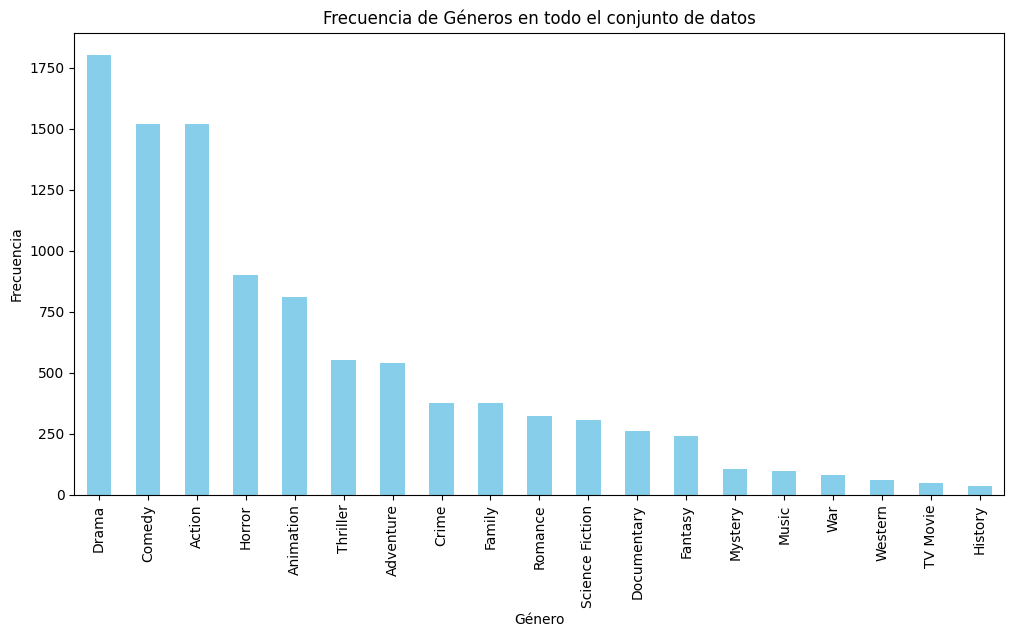

Género principal que predomina en todo el conjunto de datos: Drama


In [23]:
# Contar la frecuencia de cada género para todo el conjunto de datos
frecuencias_total = temp_df['Main Genre'].value_counts()

# Encontrar el género principal
genero_principal_total = frecuencias_total.idxmax()

plt.figure(figsize=(12, 6))
frecuencias_total.plot(kind='bar', color='skyblue')
plt.title('Frecuencia de Géneros en todo el conjunto de datos')
plt.xlabel('Género')
plt.ylabel('Frecuencia')
plt.show()

print(f"Género principal que predomina en todo el conjunto de datos: {genero_principal_total}")

El género principal que predomina en todo el conjunto de datos es el género **Drama**

***4.7 ¿Las películas de qué genero principal obtuvieron mayores ganancias?***

In [24]:
# Crear un DataFrame con la información relevante 
temp_df = pd.DataFrame({
    'Title': df['title'],
    'Genres': df['genres'],
    'Revenue': df['revenue'],
    'Main Genre': df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)
})


# Convertir la columna 'revenue' a tipo Int64
temp_df['Revenue'] = temp_df['Revenue'].astype('Int64')

# Calcular el promedio de ganancias por género principal
promedio_ganancias_por_genero = temp_df.groupby('Main Genre')['Revenue'].mean().reset_index()
promedio_ganancias_por_genero.columns = ['Main Genre', 'Promedio Ganancias']

# Convertir a DataFrame
df_promedio_ganancias = pd.DataFrame(promedio_ganancias_por_genero)

# Mostrar las primeras filas del DataFrame
df_promedio_ganancias.sort_values(by='Promedio Ganancias', ascending=False).head(20)

,Main Genre,Promedio Ganancias
1,Adventure,159466342.866913
0,Action,92843656.81357
8,Fantasy,92570434.771784
14,Science Fiction,84495153.898361
7,Family,72380927.756684
17,War,64395385.7
2,Animation,54492809.723798
3,Comedy,48051395.673469
12,Mystery,44622657.019231
9,History,42341438.2


Las películas del género principal **Adventure** obtuvieron las mayores ganancias, con un promedio de ganancias de aproximadamente $159,466,342.87.


***4.8 ¿La cantidad de actores influye en los ingresos de las películas? ¿se han hecho películas con más actores en los últimos años?***

In [25]:
# si la cantidad de actores es mayor 300, no se toma en cuenta

df_temp = df[df['actorsAmount'] < 300]


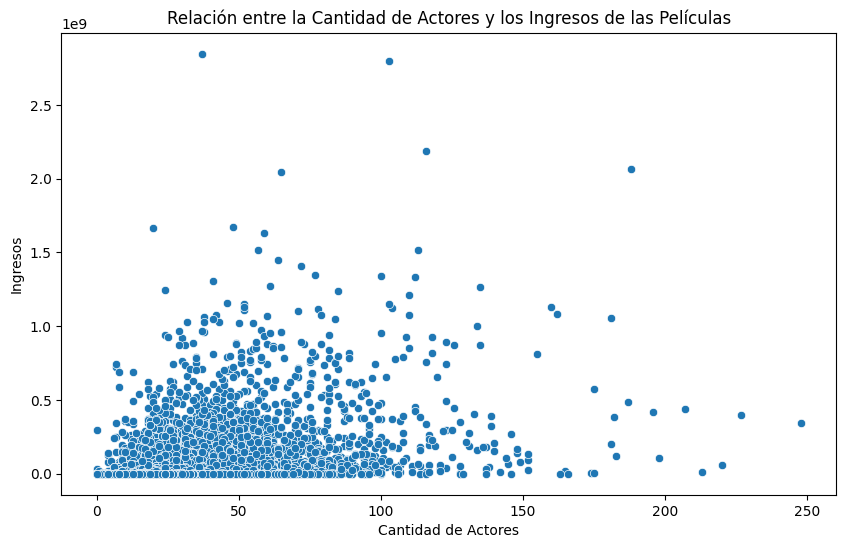

Correlación entre la cantidad de actores y los ingresos: 0.41899429421950996


In [26]:
# Crear un gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='actorsAmount', y='revenue', data=df_temp)
plt.title('Relación entre la Cantidad de Actores y los Ingresos de las Películas')
plt.xlabel('Cantidad de Actores')
plt.ylabel('Ingresos')
plt.show()

# Calcular la correlación
correlation = df_temp['actorsAmount'].corr(df_temp['revenue'])
print(f"Correlación entre la cantidad de actores y los ingresos: {correlation}")

La correlación entre la cantidad de actores en una película y sus ingresos es de 0.419. Esto indica que no existe suficiente evidencia para confirmar que exista una relacion directa entre la cantidad de actores y los ingresos

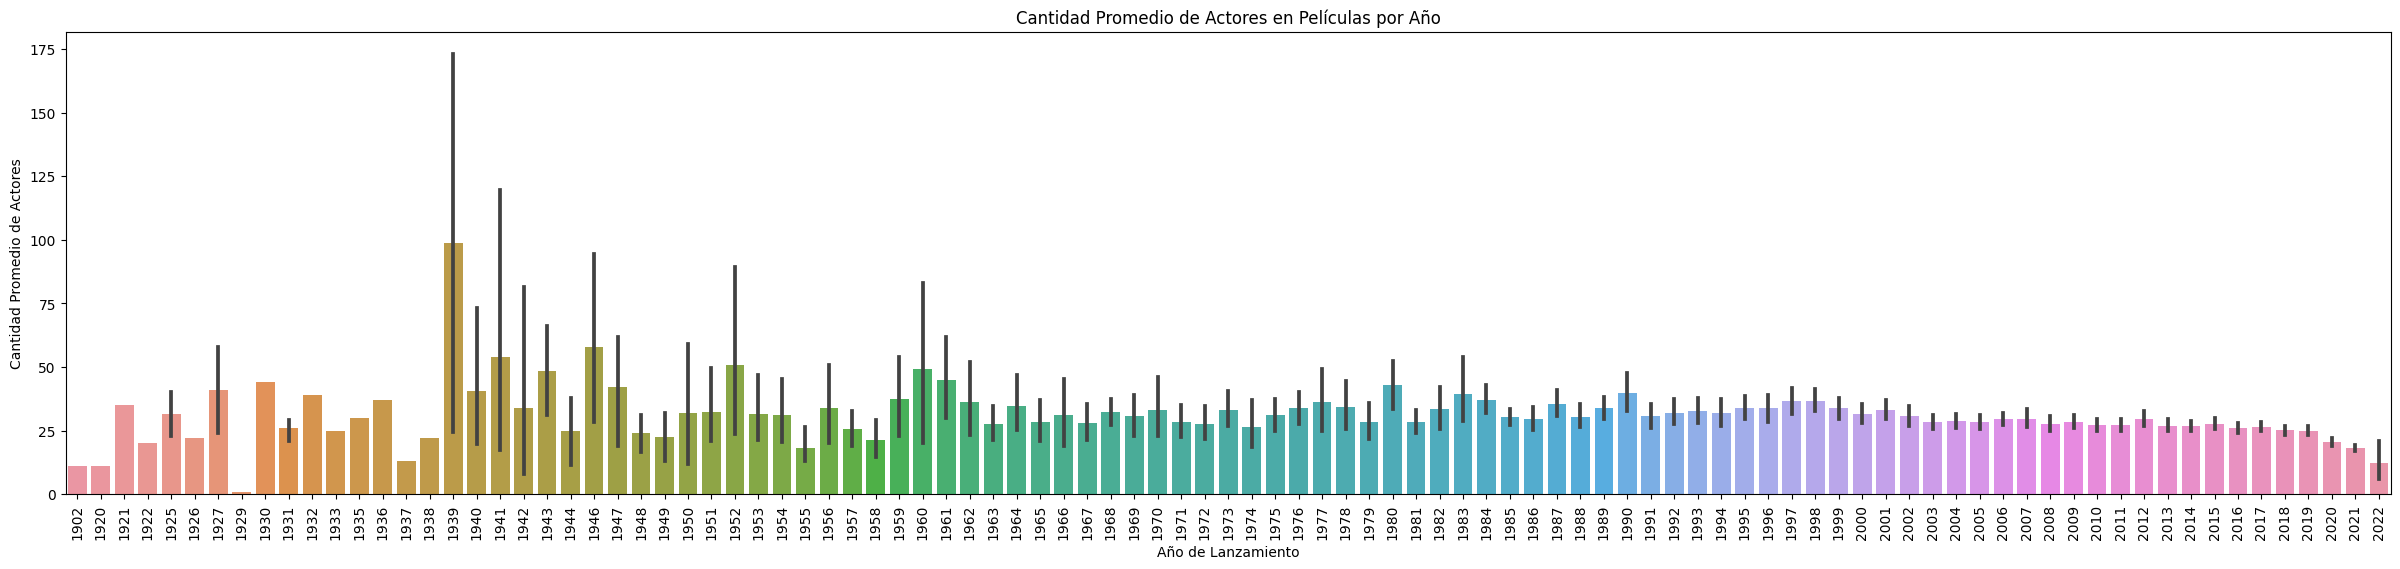

In [27]:
# Elimina filas con valores nulos en las columnas 'releaseYear' y 'actorsAmount'
df_temp = df_temp.dropna(subset=['releaseYear', 'actorsAmount'])

# Crear un gráfico de barras para la cantidad promedio de actores por año
plt.figure(figsize=(30, 6))
sns.barplot(x='releaseYear', y='actorsAmount', data=df_temp, estimator=np.mean)
plt.title('Cantidad Promedio de Actores en Películas por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Cantidad Promedio de Actores')
plt.xticks(rotation=90)  # Ajusta el ángulo de rotación según sea necesario
plt.show()

No hay suficiente evidencia para afirmar que existe una relación entre la cantidad de actores y las ganancias que genera una película. Se puede afirmar que en los últimos años se han hecho películas con menos actores que en años pasados. Se puede observar una tendencia de reducir la cantidad de actores por año. 

***4.9 ¿Es posible que la cantidad de hombres y mujeres en el reparto influya en la popularidad y los ingresos de las películas?***

In [28]:
# Filtrar las filas con valores NaN o 0 en las columnas de interés
temp = df[['revenue', 'popularity', 'castWomenAmount', 'castMenAmount']]
temp = temp[(temp != 0).all(1)].dropna()

# Filtrar datos anómalos (más de 300 hombres o mujeres)
temp = temp[(temp['castWomenAmount'] <= 300) & (temp['castMenAmount'] <= 300)]

# lo mismo, pero con popularity. 
temp = temp[(temp['popularity'] <= 300)]


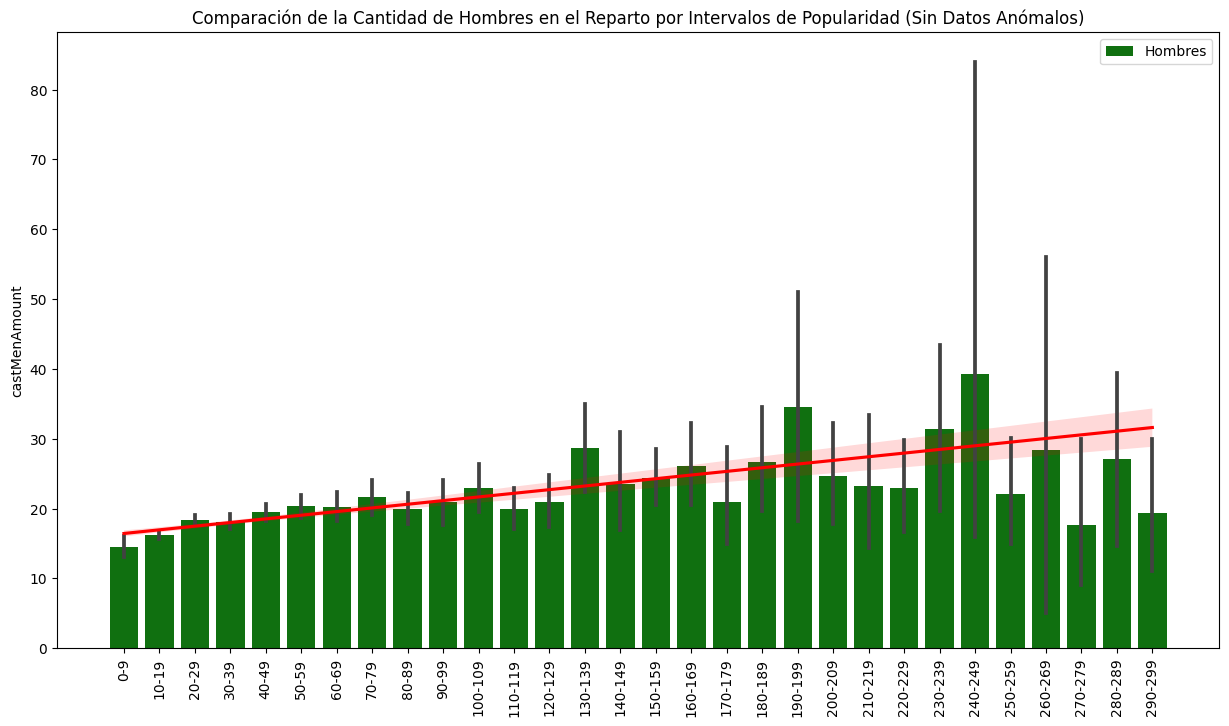

Correlación entre Popularidad e cantidad de Hombres en el Reparto: 0.1749089896414303


In [29]:
# Crear intervalos de popularidad
bins = [i for i in range(0, 301, 10)]
labels = [f'{i}-{i+9}' for i in range(0, 300, 10)]

temp['popularity_interval'] = pd.cut(temp['popularity'], bins=bins, labels=labels, right=False)

# Crear un gráfico de barras con barras apiladas para hombres y mujeres
plt.figure(figsize=(15, 8))
sns.barplot(x='popularity_interval', y='castMenAmount', data=temp, label='Hombres', color='green')

# Añadir etiquetas y título
plt.title('Comparación de la Cantidad de Hombres en el Reparto por Intervalos de Popularidad (Sin Datos Anómalos)')
plt.xlabel('Intervalo de Popularidad')
plt.ylabel('Cantidad de Actores')

# Mostrar la leyenda
plt.legend()
plt.xticks(rotation=90)  # Ajusta el ángulo de rotación según sea necesario

# Añadir una curva de tendencia
sns.regplot(x=pd.to_numeric(temp['popularity_interval'].cat.codes), y='castMenAmount', data=temp, scatter=False, color='red', order=1)

# Mostrar el gráfico de barras con la curva de tendencia
plt.show()

# Calcular el valor de la correlación
correlation_value = temp['popularity_interval'].cat.codes.corr(temp['castMenAmount'])
print(f'Correlación entre Popularidad e cantidad de Hombres en el Reparto: {correlation_value}')



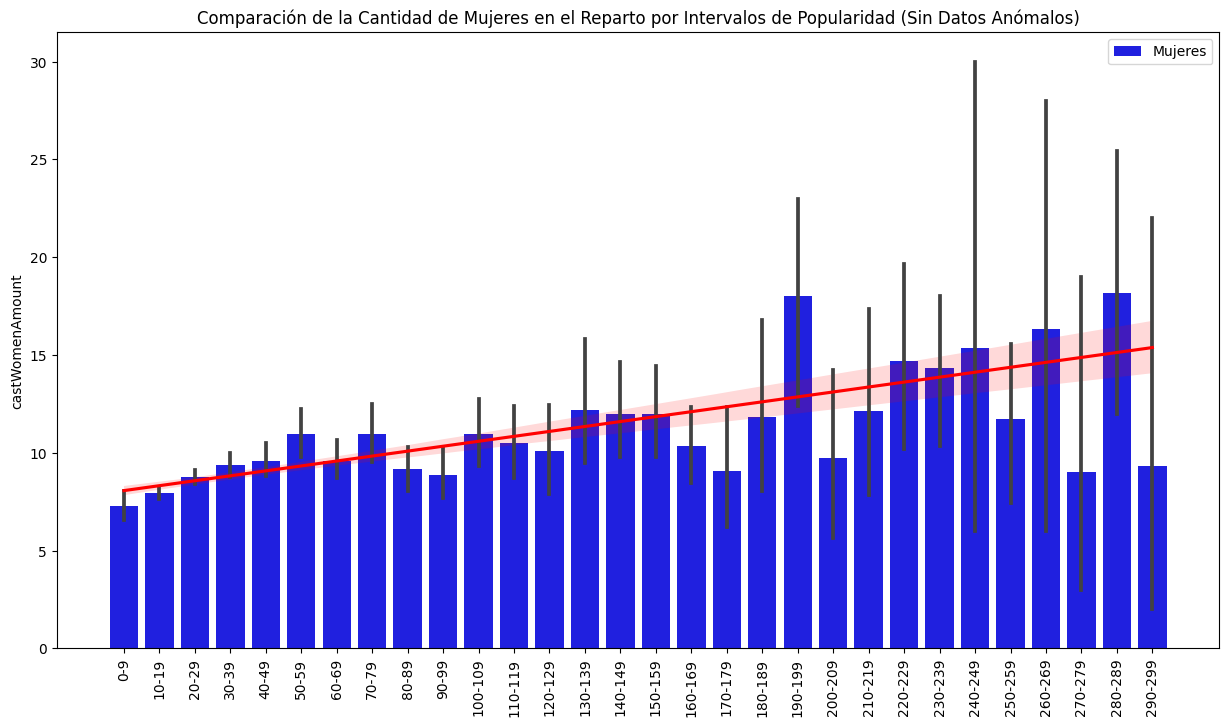

Correlación entre Popularidad e cantidad de Mujeres en el Reparto: 0.1497685513679887


In [30]:
# Crear intervalos de popularidad
bins = [i for i in range(0, 301, 10)]
labels = [f'{i}-{i+9}' for i in range(0, 300, 10)]

temp['popularity_interval'] = pd.cut(temp['popularity'], bins=bins, labels=labels, right=False)

# Crear un gráfico de barras con barras apiladas para hombres y mujeres
plt.figure(figsize=(15, 8))
sns.barplot(x='popularity_interval', y='castWomenAmount', data=temp, label='Mujeres', color='blue')

# Añadir etiquetas y título
plt.title('Comparación de la Cantidad de Mujeres en el Reparto por Intervalos de Popularidad (Sin Datos Anómalos)')
plt.xlabel('Intervalo de Popularidad')
plt.ylabel('Cantidad de Actrices')

# Mostrar la leyenda
plt.legend()
plt.xticks(rotation=90)  # Ajusta el ángulo de rotación según sea necesario

# Añadir una curva de tendencia polinómica de tercer grado para castMenAmount
sns.regplot(x=pd.to_numeric(temp['popularity_interval'].cat.codes), y='castWomenAmount', data=temp, scatter=False, color='red', order=1)

# Mostrar el gráfico de barras con la curva de tendencia
plt.show()

# Calcular el valor de la correlación
correlation_value = temp['popularity_interval'].cat.codes.corr(temp['castWomenAmount'])
print(f'Correlación entre Popularidad e cantidad de Mujeres en el Reparto: {correlation_value}')

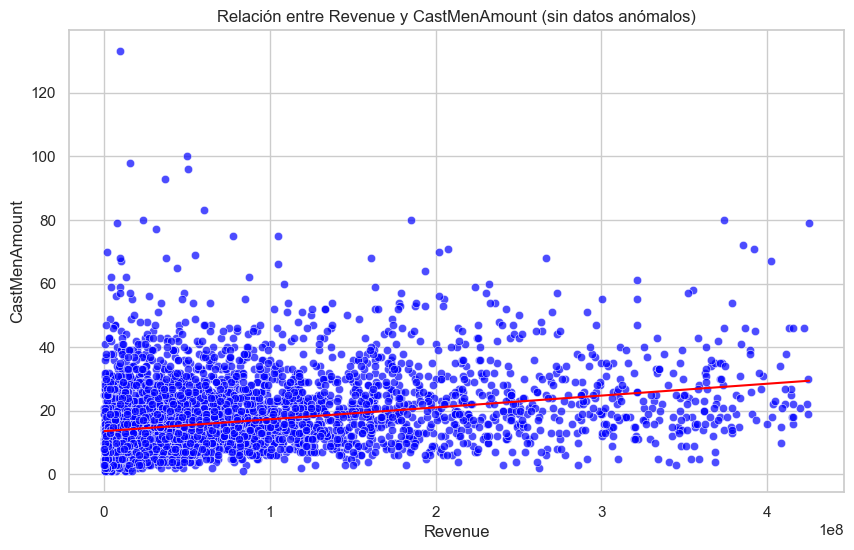

Correlación entre Revenue y CastMenAmount: 0.30431656841303123


In [31]:
# Filtrar datos anómalos usando el método de los cuantiles
q_low = temp['revenue'].quantile(0.05)
q_high = temp['revenue'].quantile(0.95)
temp_filtered = temp[(temp['revenue'] >= q_low) & (temp['revenue'] <= q_high)]

# Gráfica de dispersión con línea de tendencia
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear la gráfica de dispersión
scatter_plot = sns.scatterplot(x='revenue', y='castMenAmount', data=temp_filtered, color='blue', alpha=0.7)

# Calcular la regresión robusta
ols_model = sm.RLM(temp_filtered['castMenAmount'], sm.add_constant(temp_filtered['revenue'])).fit()

# Agregar la línea de tendencia
sns.lineplot(x=temp_filtered['revenue'], y=ols_model.fittedvalues, color='red', ax=scatter_plot)

# Personalizar la gráfica
plt.title('Relación entre Revenue y CastMenAmount (sin datos anómalos)')
plt.xlabel('Revenue')
plt.ylabel('CastMenAmount')

# Mostrar la gráfica
plt.show()

# Calcular el valor de la correlación
correlation_value = temp_filtered['revenue'].corr(temp_filtered['castMenAmount'])
print(f'Correlación entre Revenue y CastMenAmount: {correlation_value}')

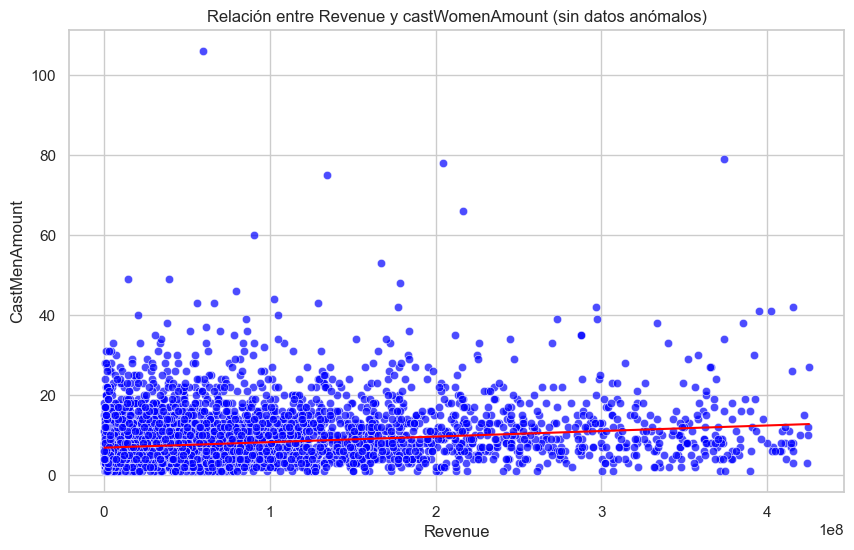

Correlación entre Revenue y castWomenAmount: 0.22568070887590122


In [32]:
# Filtrar datos anómalos usando el método de los cuantiles
q_low = temp['revenue'].quantile(0.05)
q_high = temp['revenue'].quantile(0.95)
temp_filtered = temp[(temp['revenue'] >= q_low) & (temp['revenue'] <= q_high)]

# Gráfica de dispersión con línea de tendencia
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Crear la gráfica de dispersión
scatter_plot = sns.scatterplot(x='revenue', y='castWomenAmount', data=temp_filtered, color='blue', alpha=0.7)

# Calcular la regresión robusta
ols_model = sm.RLM(temp_filtered['castWomenAmount'], sm.add_constant(temp_filtered['revenue'])).fit()

# Agregar la línea de tendencia
sns.lineplot(x=temp_filtered['revenue'], y=ols_model.fittedvalues, color='red', ax=scatter_plot)

# Personalizar la gráfica
plt.title('Relación entre Revenue y castWomenAmount (sin datos anómalos)')
plt.xlabel('Revenue')
plt.ylabel('CastMenAmount')

# Mostrar la gráfica
plt.show()

# Calcular el valor de la correlación
correlation_value = temp_filtered['revenue'].corr(temp_filtered['castWomenAmount'])
print(f'Correlación entre Revenue y castWomenAmount: {correlation_value}')

A pesar de la aparente tendencia positiva entre la cantidad de hombres o mujeres y los ingresos o popularidad, al obtener el valor de la correlación entre estas variables podemos afirmar que en todos los casos no existe suficiente evidencia para establecer una correlación entre hombres o mujeres y el revenue o la popularidad. 

***4.10 ¿Quiénes son los directores que hicieron las 20 películas mejor calificadas?***

In [33]:
#Encontrar los directores que hicieron las 20 películas con mayor calificación 

# Crear un DataFrame con la información relevante

temp_df = pd.DataFrame({
    'Title': df['title'],
    'Director': df['director'],
    'Vote Average': df['voteAvg'],
    'Vote Count': df['voteCount']
})

#calcular el promedio de cantidad de votos
promedio_votos = temp_df['Vote Count'].mean()


# tomar las peliculas que tienen 1000 votos o mas

temp_df = temp_df[temp_df['Vote Count'] >= 1000]

# Convertir la columna 'voteCount' a tipo Int64
temp_df['Vote Count'] = temp_df['Vote Count'].astype('Int64')

# Ordenar el DataFrame por la columna 'voteCount' en orden descendente

temp_df = temp_df.sort_values(by='Vote Average', ascending=False)

temp_df.head(20)


,Title,Director,Vote Average,Vote Count
3180,Dilwale Dulhania Le Jayenge,[Aditya Chopra],8.7,3372
159,The Shawshank Redemption,[Frank Darabont],8.7,20598
135,The Godfather,[Francis Ford Coppola],8.7,15380
9331,Gabriel's Inferno,[Tosca Musk],8.6,2188
9422,Gabriel's Inferno Part II,[Tosca Musk],8.6,1376
217,Schindler's List,[Steven Spielberg],8.6,12282
137,The Godfather: Part II,[Francis Ford Coppola],8.6,9266
6605,Your Name.,[Makoto Shinkai],8.6,8274
7919,Parasite,[Bong Joon-ho],8.5,12979
341,Life Is Beautiful,[Roberto Benigni],8.5,10781


Se muestran las 20 películas con mayor calificación, ordenadas por el promedio de votos y sus directores. 

***4.11 ¿Cómo se correlacionan los presupuestos con los ingresos? ¿Los altos presupuestos significan altos ingresos? Haga los gráficos que necesite, histograma, diagrama de dispersión***

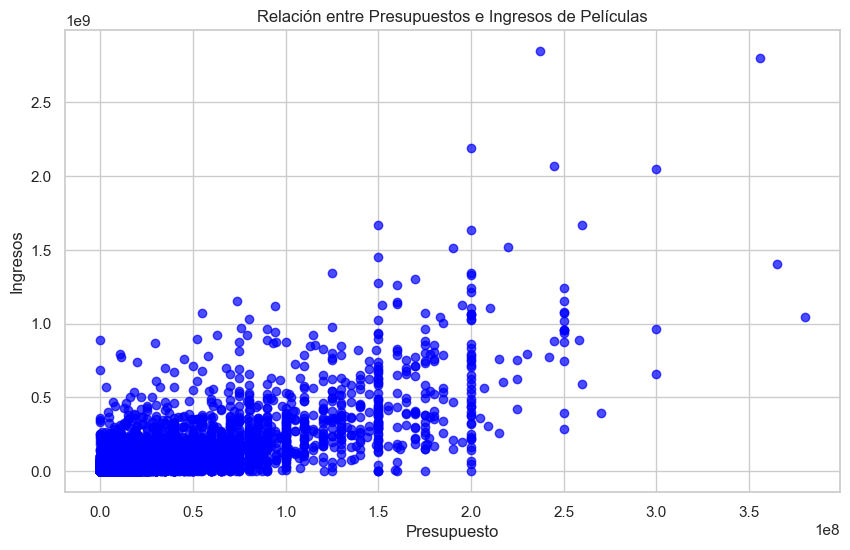

In [34]:
# Encontar como se relacionan los presupuestos y los ingresos de las peliculas
# Graficar la relación entre presupuestos e ingresos
plt.figure(figsize=(10, 6))
plt.scatter(df['budget'], df['revenue'], color='blue', alpha=0.7)
plt.title('Relación entre Presupuestos e Ingresos de Películas')
plt.xlabel('Presupuesto')
plt.ylabel('Ingresos')
plt.show()

In [35]:
# Calcular la correlación entre presupuestos e ingresos
correlacion_presupuesto_ingresos = df['budget'].corr(df['revenue'])

# Mostrar la correlación
print(f"Correlación entre presupuestos e ingresos: {correlacion_presupuesto_ingresos}")

Correlación entre presupuestos e ingresos: 0.7574554817323187


La tendencia indica que, a mayor presupuesto, mayor ingreso. Se observa además una correlación del 75% entre estas dos variables. 

**4.12 ¿Se asocian ciertos meses de lanzamiento con mejores ingresos?**

In [36]:
# Encontrar la correlacion entre el mes de lanzamiento y los ingresos

# Convertir la columna 'releaseDate' a tipo datetime
df['releaseDate'] = pd.to_datetime(df['releaseDate'], errors='coerce')

# Crear una nueva columna con el mes de lanzamiento
df['releaseMonth'] = df['releaseDate'].dt.month

# Calcular la correlación entre el mes de lanzamiento y los ingresos
correlacion_ingresos_mes = df['releaseMonth'].corr(df['revenue'])

# Mostrar la correlación
print(f"Correlación entre el mes de lanzamiento y los ingresos: {correlacion_ingresos_mes}")


Correlación entre el mes de lanzamiento y los ingresos: 0.0180818574106969


Habiendo obtenido la correlación entre los meses del año y el ingreso (revenue) que generaron las películas lanzados en esos meses, podemos afirmar que no existe suficiente evidencia para establecer una relación entre el mes de lanzamiento y los ingresos. 

**4.13 ¿En qué meses se han visto los lanzamientos con mejores ingresos? ¿cuantas películas, en promedio, se han lanzado por mes?**

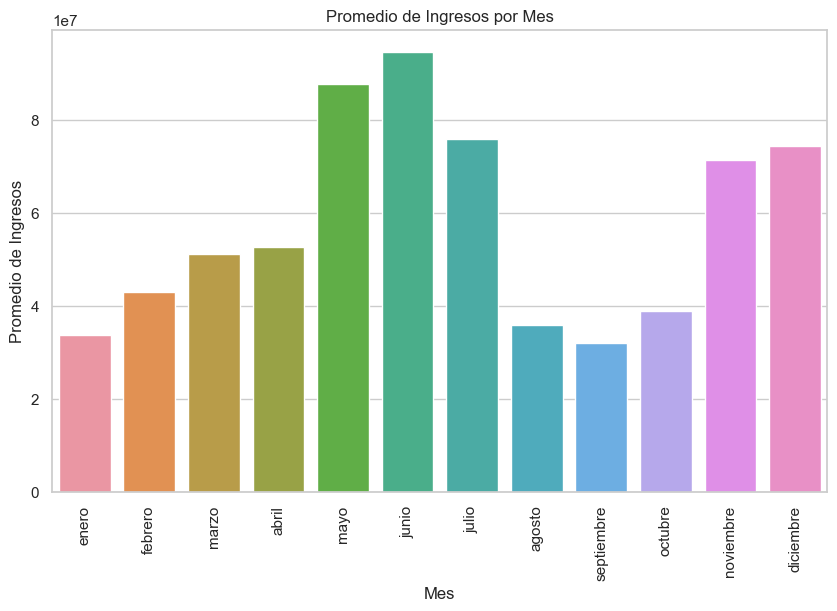

In [37]:
# Encontrar los ingresos que tienen las peliculas dependiendo del mes de lanzamiento

# Crear un DataFrame con la información relevante
temp_df = pd.DataFrame({
    'Title': df['title'],
    'Release Date': df['releaseDate'],
    'Revenue': df['revenue']
})

# Convertir la columna 'revenue' a tipo float
temp_df['Revenue'] = temp_df['Revenue'].astype('Int64')

# Convertir la columna 'releaseDate' a tipo datetime
temp_df['Release Date'] = pd.to_datetime(temp_df['Release Date'], errors='coerce')

# Extraer el mes de la fecha de lanzamiento y convertirlo a tipo entero
temp_df['Release Month'] = temp_df['Release Date'].dt.month.astype('Int64')

# Calcular el promedio de ingresos por mes
promedio_ingresos_por_mes = temp_df.groupby('Release Month')['Revenue'].mean().reset_index()
#Converir el mes a nombre
promedio_ingresos_por_mes['Release Month'] = promedio_ingresos_por_mes['Release Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
promedio_ingresos_por_mes.columns = ['Release Month', 'Promedio Ingresos']

# Convertir a DataFrame
df_promedio_ingresos_por_mes = pd.DataFrame(promedio_ingresos_por_mes)

# Graficar el promedio de ingresos por mes

plt.figure(figsize=(10, 6))
sns.barplot(x='Release Month', y='Promedio Ingresos', data=df_promedio_ingresos_por_mes)
plt.title('Promedio de Ingresos por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Ingresos')
plt.xticks(rotation=90)  # Ajusta el ángulo de rotación según sea necesario
plt.show()




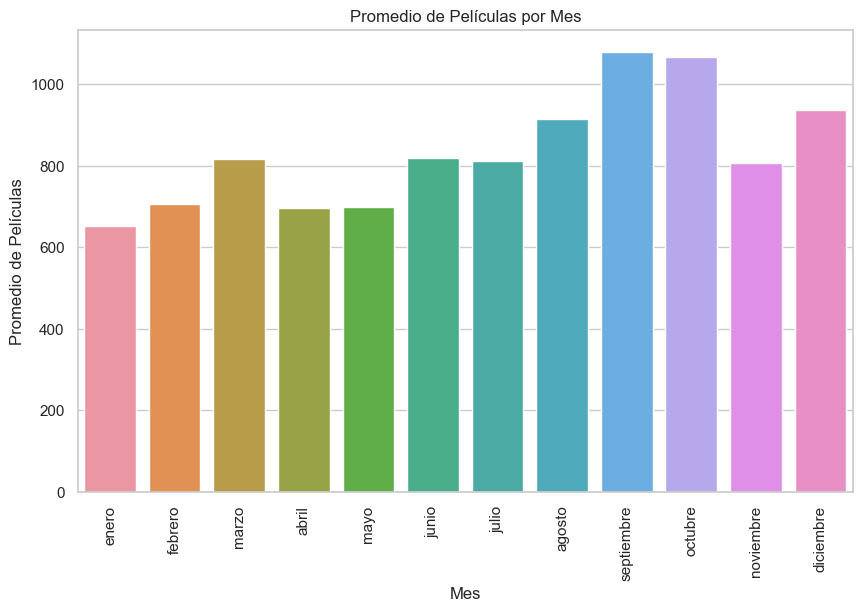

In [38]:
# Calcular cuantas peliculas en promedio se lanzan por mes

# Calcular el promedio de películas por cada mes
promedio_peliculas_por_mes = temp_df.groupby('Release Month')['Title'].count().reset_index()
#Converir el mes a nombre
promedio_peliculas_por_mes['Release Month'] = promedio_peliculas_por_mes['Release Month'].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
promedio_peliculas_por_mes.columns = ['Release Month', 'Promedio Películas']

# Convertir a DataFrame
df_promedio_peliculas_por_mes = pd.DataFrame(promedio_peliculas_por_mes)

# Graficar el promedio de películas por mes
plt.figure(figsize=(10, 6))
sns.barplot(x='Release Month', y='Promedio Películas', data=df_promedio_peliculas_por_mes)
plt.title('Promedio de Películas por Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Películas')
plt.xticks(rotation=90)  # Ajusta el ángulo de rotación según sea necesario
plt.show()

Los mejores meses para lanzar películas son mayo, junio y julio; mientras que los meses en los que más se lanzan películas son agosto, septiembre y octubre. 

**4.14 ¿Cómo se correlacionan las calificaciones con el éxito comercial?**

In [39]:
# Exito comercial se consiera revenue-budget. 
# Si en alguna fila falta el revenue o el budget, no se toma en cuenta. 
# Si alguna fila falta voteAvg, no se toma en cuenta. 
# voteAvg es y en la gráfica, la diferencia entre revenue y budget es x.

# Crear un DataFrame con la información relevante
temp_df = pd.DataFrame({
    'Title': df['title'],
    'Revenue': df['revenue'],
    'Budget': df['budget'],
    'Vote Average': df['voteAvg']
})

# Filtrar las filas con valores NaN o 0 en las columnas de interés
temp_df = temp_df[(temp_df != 0).all(1)].dropna()

# Calcular el éxito comercial
temp_df['Commercial Success'] = temp_df['Revenue'] - temp_df['Budget']

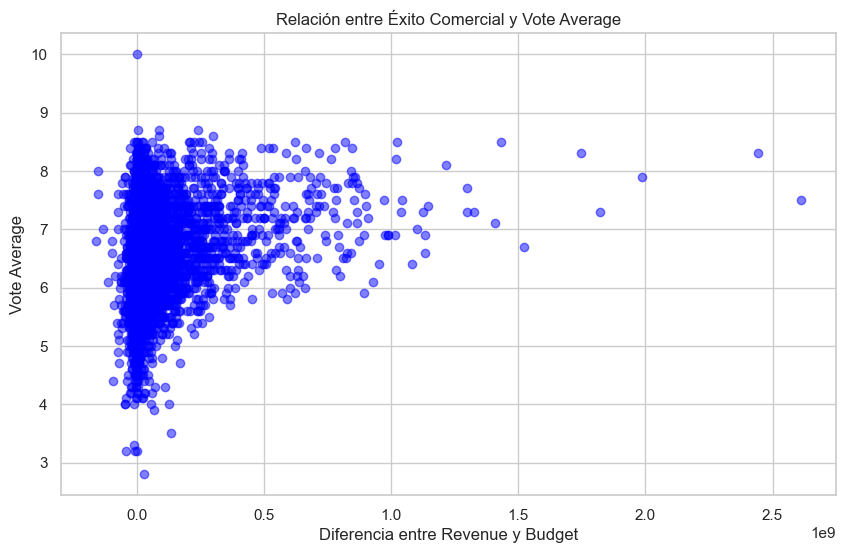

Correlación entre Commercial Success y Vote Average: 0.22311172849389263


In [40]:
# Crear la gráfica de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(temp_df['Commercial Success'], temp_df['Vote Average'], color='blue', alpha=0.5)

# Agregar etiquetas y título
plt.title('Relación entre Éxito Comercial y Vote Average')
plt.xlabel('Diferencia entre Revenue y Budget')
plt.ylabel('Vote Average')

# Mostrar la gráfica
plt.show()

# Calcular la correlación entre Commercial Success y Vote Average
correlation_value = temp_df['Commercial Success'].corr(temp_df['Vote Average'])

# Mostrar el valor de correlación
print(f"Correlación entre Commercial Success y Vote Average: {correlation_value}")

Habiendo obtenido el valor de la correlación entre el éxito comercial y la calificación promedio de las películas, podemos decir que no existe suficiente evidencia para afirmar que exista una relación entre el éxito comercial y la calificación de las películas. 

**4.15 ¿A qué género principal pertenecen las películas más largas?**

In [41]:
#Encontrar a que genero principal pertenecen las peliculas con las peliculas mas largas

# Definimos que una pelicula es larga si dura mas de 1.5 horas
temp_df = df[df['runtime'] > 90]

# Crear un DataFrame con la información relevante
temp_df = pd.DataFrame({
    'Title': temp_df['title'],
    'Main Genre': temp_df['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None), 
    'Runtime': temp_df['runtime']
})

# Calcular el promedio de duración por género principal
promedio_duracion_por_genero = temp_df.groupby('Main Genre')['Runtime'].mean().reset_index()
promedio_duracion_por_genero.columns = ['Main Genre', 'Promedio Duración']

# Convertir a DataFrame
df_promedio_duracion = pd.DataFrame(promedio_duracion_por_genero)

# Mostrar las primeras filas del DataFrame
df_promedio_duracion.sort_values(by='Promedio Duración', ascending=False).head(1)

,Main Genre,Promedio Duración
9,History,127.193548


Las películas con mayor duración pertenecen al género de historia. 